In [1]:
#Imports

In [2]:
import os
os.chdir('../app')

In [3]:
import numpy as np
from pymongo import MongoClient, UpdateMany, UpdateOne, InsertOne
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib as mpl

In [4]:
import preprocessing.preglobal as pg
import frontend.stock_analytics as salib
import lob.lob as loblib 

/opt/conda/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [5]:
import copy
import pandas as pd

In [6]:
import random as rand

In [7]:
import datetime
import cv2
import json
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.dates as mdates

In [8]:
def graph_pre(size=1):
    rc('font',**{'family':'serif','serif':['Times']})
    rc('text', usetex=True)
    h = [0,3,5][size]
    
    plt.rcParams["figure.figsize"] = (7.5,h)
    
def graph_post():
    plt.tight_layout()

In [9]:
plt.rcParams["figure.figsize"] = (15,5)

In [10]:
folder = "Thesis/generated_figures/"

In [11]:
url='mongodb://192.168.0.94:27017/'
client = MongoClient(url)
tbl = client['global']['keynotes']
tbl2 = client['global']['timekeys']

In [12]:
r = pg.get_redis_client()

redis 192.168.0.94


In [15]:
salib.tic()
# Load all Graphs
sa_array = []
for i in pg.get_kn_entries({'selected':1}):
    print('load',i['id'])
    sa_array.append({'kn':i,'sa':salib.stock_analytics(i['id'], gui_mode=False)})
sa = sa_array[0]['sa']
salib.toc()

mongo mongodb://192.168.0.94:27017/
load 20190910_AAPL
redis 192.168.0.94
load 20190325_AAPL
redis 192.168.0.94
load 20181030_AAPL
redis 192.168.0.94
load 20180912_AAPL
redis 192.168.0.94
load 20180604_AAPL
redis 192.168.0.94
load 20180327_AAPL
redis 192.168.0.94
load 20170912_AAPL
redis 192.168.0.94
load 20170605_AAPL
redis 192.168.0.94
load 20161027_AAPL
redis 192.168.0.94
load 20160907_AAPL
redis 192.168.0.94
load 20160613_AAPL
redis 192.168.0.94
load 20160321_AAPL
redis 192.168.0.94
load 20150909_AAPL
redis 192.168.0.94
load 20150608_AAPL
redis 192.168.0.94
load 20150309_AAPL
redis 192.168.0.94
Elapsed time: 0.04580277600325644s


In [18]:
salib.time_as_string = True
filte = copy.deepcopy(sa.filters['default'])

In [19]:
lob = loblib.LimitOrderBook()

In [21]:
lob.ticks = sa.ticks

In [22]:
df = lob.calc_lob_by_order_mongo(13*3600*1000)

In [23]:
df = df.sort_values(["direction","price"],axis=0)

In [24]:
bid = max(df[df["direction"]==-1]["price"])

In [25]:
ask = min(df[df["direction"]==1]["price"])

In [26]:
sel = df[(df["price"]>bid-400) & (df["price"]<ask+400)]

In [27]:
grouped = sel.groupby("price").count()
distinct_prices = grouped.index
max_count = max(grouped["direction"])

In [28]:
plt.rcParams.update({
    "text.usetex": True})

In [29]:

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

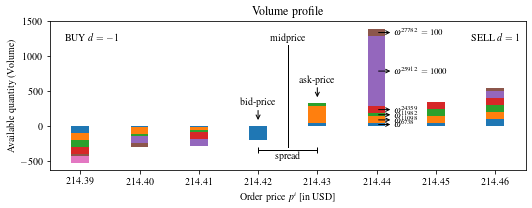

In [30]:
graph_pre()

fig, ax = plt.subplots()
resold = np.zeros(len(distinct_prices))
for i in range(0, max_count):
    res = []
    for j in distinct_prices:
        q = sel[sel["price"]==j]
        q = list(q["direction"]*q["qty"])
        if len(q) > i:
            res.append(q[i])
        else:
            res.append(0)

    ax.bar(distinct_prices/10000, res,0.0030, bottom=resold)

    resold += np.array(res)

ax.set_ylabel('Available quantity (Volume)')
ax.set_xlabel('Order price $p^i$ [in USD]')
ax.set_title('Volume profile')

ax.annotate('bid-price', xy=(214.42, 50),  xycoords='data',
            xytext=(214.42, 400), textcoords='data', 
            arrowprops=dict(facecolor='black',  arrowstyle='->'),
            horizontalalignment='center', verticalalignment='top',
            )
ax.annotate('ask-price', xy=(214.43, 375),  xycoords='data',
            xytext=(214.43, 725), textcoords='data',
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            horizontalalignment='center', verticalalignment='top'
            )
resold = 0
for i in range(0, max_count):
    j = 2144400
    qr = sel[sel["price"]==j]
 
    q = list(qr["direction"]*qr["qty"])
    if len(q) > i:
        res = q[i]
        if i > -1:
            ax.annotate('$\omega^{'+str(qr.index[i])+'}'+(' = '+str(list(qr["qty"])[i]) if qr.index[i] > 25000 else '')+'$', xy=(j/10000, resold+res/2),  xycoords='data',
                xytext=(j/10000+0.003, resold+res/2), textcoords='data', 
                arrowprops=dict(facecolor='black', arrowstyle='<-'),
                horizontalalignment='left', verticalalignment='center', fontsize=9
                )
       
        resold += res
    
plt.plot( [214.425,214.425], [-300,1150], c='k', lw=1)
x1, y1 = [214.42, 214.43], [-350,-350]
plt.plot(x1, y1, marker = '|', c='k', lw=1)
plt.ylim([None, 1500])


plt.text(214.425, -425, 'spread', horizontalalignment='center',
     verticalalignment='center')

plt.text(214.425, 1250, 'midprice', horizontalalignment='center',
     verticalalignment='center')

plt.text(214.392, 1250, 'BUY $d=-1$', horizontalalignment='center',
     verticalalignment='center')

plt.text(214.46, 1250, 'SELL $d=1$', horizontalalignment='center',
     verticalalignment='center')

graph_post()
fig.savefig(folder+"res_lob.pdf")

In [31]:
# Lifecycle of an order

cs = lob.ticks.aggregate(
           [
             {"$project":{
                 "id":"$id",
                 "type_fill":{"$cond": [ { "$eq": [ "$type", "fill" ] }, 1, 0 ]},
                 "type_sell":{"$cond": [ { "$eq": [ "$type", "sell" ] }, 1, 0 ]},
                 "type_execute":{"$cond": [ { "$eq": [ "$type", "execute" ] }, 1, 0 ]},
                 "type_cancel":{"$cond": [ { "$eq": [ "$type", "cancel" ] }, 1, 0 ]}
             }},
             {
               "$group":
                 {
                    "_id": {"id":"$id"},
                    "count_fill": { "$sum": "$type_fill"},
                    "count_sell": { "$sum": "$type_sell"},
                    "count_execute": { "$sum": "$type_execute"},
                    "count_cancel": { "$sum": "$type_cancel"}
                 }
             },
               {"$match":{"count_fill":{"$gte":1},
                         "count_sell":{"$gte":1},
                         "count_execute":{"$gte":1},
                         "count_cancel":{"$gte":1}}}
             ,{"$project":{"_id":0, "id":"$_id.id"}}
           ]
        )
res = pd.DataFrame(list(cs))

In [32]:
ids = res['id']

In [33]:
plt.rcParams['font.size'] = 10

In [38]:
def round_seconds(obj: datetime.datetime) -> datetime.datetime:
    if obj.microsecond >= 500_000:
        obj += datetime.timedelta(seconds=1)
    return obj.replace(microsecond=0)

[datetime.datetime(2021, 10, 31, 14, 0, 27, 904600), datetime.datetime(2021, 10, 31, 14, 0, 31, 368200)]
(18931.58365630324, 18931.583696391204)
(18931.58365630324, 18931.583696391204)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


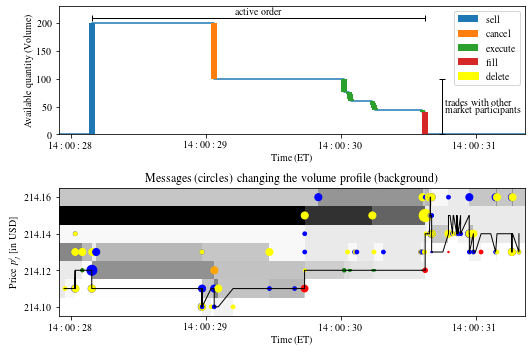

In [39]:
mapmsg = ["sell","cancel","execute","fill","delete"]
colormap = ["blue","orange","green","red","yellow"]
graph_pre(size=2)
salib.time_as_string = False
for i in [248589369]:
   
    msgs = pd.DataFrame(list(lob.ticks.aggregate([{"$match":{"id":i}}])))
    fig, axs = plt.subplots(2)
    fig.tight_layout(pad=3.5)
    ax = axs[0]
    ax2 =axs[1]
    points = [(salib.to_date_i(0),0)]
    prevqty = 0
    
    x = [[],[],[],[]]
    b = [[],[],[],[]]
    t = [[],[],[],[]]
    q = 0
    for j in range(0,msgs["ask"].count()): 
        tt = salib.to_date_i(msgs["timestamp"][j])
        d = msgs["qty"][j]
        
        points.append((tt,prevqty))
        prevqty += d
        points.append((tt,prevqty))
        
        x[mapmsg.index(msgs["type"][j])].append(d)
        b[mapmsg.index(msgs["type"][j])].append( q)
        t[mapmsg.index(msgs["type"][j])].append( tt)
        q += d
    
    points.append((salib.to_date_i(18*3600*1000),0))
    
    jp,kp = zip(*points)
    ax.plot(jp,kp,zorder=0)
    active_time = (jp[len(jp)-2]-jp[1])
    
    xlim = [jp[1]-active_time*0.1 ,jp[1]+active_time*1.3]

    for j,k,l,m in zip(mapmsg, x,b,t):
        ax.bar(m, k,0.0000005, bottom=l, label=j,zorder=1)
    
    ax.set_ylim(top=225)
    print(xlim)
    
    ax.set_ylabel('Available quantity (Volume)')
    ax.set_xlabel('Time (ET)') 
    
    handles, labels = ax.get_legend_handles_labels()

    patch = mpatches.Patch(color='yellow', label='delete')   


    handles.extend([patch])
    ax.legend(handles=handles)
    
    x1, y1 = [jp[1],jp[(len(jp)-2)]], [210,210]
    ax.plot(x1, y1, marker = '|', clip_on=False,  c='k', lw=1)
    ax.text(jp[1]+0.5*(jp[(len(jp)-2)]-jp[1]), 220, 'active order', horizontalalignment='center',
     verticalalignment='center')
    
    dist = 0.05
    x1, y1 = [jp[(len(jp)-2)]+dist*(jp[(len(jp)-2)]-jp[1]), jp[(len(jp)-2)]+dist*(jp[(len(jp)-2)]-jp[1])], [0,kp[4]]
    ax.plot(x1, y1, marker = '_', clip_on=False,  c='k', lw=1)
    ax.set_ylim([None, 230])
    ax.text(jp[(len(jp)-2)]+dist*1.2*(jp[(len(jp)-2)]-jp[1]), 0.56*kp[4], 'trades with other', horizontalalignment='left',
     verticalalignment='center')
    ax.text(jp[(len(jp)-2)]+dist*1.2*(jp[(len(jp)-2)]-jp[1]), 0.44*kp[4], 'market participants', horizontalalignment='left',
     verticalalignment='center')

    filte['numbins']=100000
    filte['range']['time'] = [salib.to_millis(xlim[0].strftime("%Y-%m-%d %H:%M:%S.%f")), salib.to_millis(xlim[1].strftime("%Y-%m-%d %H:%M:%S.%f"))]
    t = sa.calculate_graph(sa.graphlist['askprice'],filte, histogram=False)
    t4 = t
    ax2.plot(t[0],t[1], lw=1, c='k')
    
    cs = lob.ticks.aggregate(
           [
            
               {"$match":{"timestamp":{"$gte":filte['range']['time'][0],"$lte":filte['range']['time'][1]},
                          "price":{"$gte":2141000,"$lte":2141600},"direction":1}
                         }
             
           ]
        )
    res = pd.DataFrame(list(cs))

    
    
    ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:.2f}".format(x)))

    ax2.scatter([salib.to_date_i(x) for x in res["timestamp"]], res["price"]/10000, s=[abs(x)*0.5for x in res["qty"]],
                c=[colormap[mapmsg.index(x)] for x in res["type"]])#, s=area, c=colors, alpha=0.5)
    ax2.set_title("Messages (circles) changing the volume profile (background)")
    
    salib.globalquery = [{"$match":{"direction":1}}]
    filte["range"]["price"] = [2141050, 2141850]
    filte["range"]["time"][0] -= 1000
    filte["range"]["time"][1] += 1000
    filte['numbins']=1000000000
    t = sa.calculate_graph(sa.graphlist['full_lob_2d_nozoom'],filte, histogram=False)

    t2= t
    ax2.pcolormesh(t2[2], t2[1]-0.005, np.array(t2[0]).T, zorder=-1, cmap="binary")
    ax2.set_xlabel('Time (ET)')
    ax.set_xlim(xlim)
    ax2.set_xlim(xlim)
    
    myFmt = mdates.DateFormatter('%H:%M:%S')
    xxticks  = np.arange(round_seconds(xlim[0]),xlim[1], datetime.timedelta(seconds=1))
    ax.set_xticks(xxticks)
    ax2.set_xticks(xxticks)
    ax2.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_formatter(myFmt)
    ax2.set_ylabel('Price $p^i_j$ [in USD]')
    
    rect = patches.Rectangle((datetime.datetime(2021, 10, 27, 14, 0, 28,90000), 214.117), datetime.timedelta(microseconds=120000), .006, linewidth=1, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
    rect = patches.Rectangle((datetime.datetime(2021, 10, 27, 14, 0, 29,0), 214.117), datetime.timedelta(microseconds=120000), .006, linewidth=1, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
    rect = patches.Rectangle((datetime.datetime(2021, 10, 27, 14, 0, 29,950000), 214.117), datetime.timedelta(microseconds=350000), .006, linewidth=1, edgecolor='r', facecolor='none')
    ax2.add_patch(rect)
    rect = patches.Rectangle((datetime.datetime(2021, 10, 27, 14, 0, 30,560000), 214.117), datetime.timedelta(microseconds=120000), .006, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax2.add_patch(rect)
    print(ax.get_xlim())
    
    print(ax.get_xlim())
    graph_post()
    fig.savefig(folder+"res_lob2.pdf")

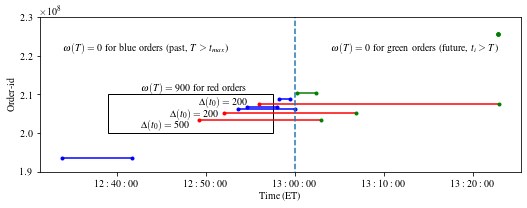

In [40]:
graph_pre()
price_range = [2144300 + 5200]

for price_64 in price_range:
    # Active orders
    fig, ax = plt.subplots()
    
    price = int(price_64)
    cs_active = lob.ticks.aggregate(
               [

                   {"$match":{"direction":1, 
                              "price":price,
                              "timestamp":{"$lt":13*1000*3600},
                             "last_action":{"$gt":13*1000*3600}}},
                   {"$group": {"_id":{"id":"$id", "ts":"$last_action"}, "count":{"$sum":1}}}, 
                             {"$project": {"_id":"$_id.id", "ts":"$_id.ts", "count":1}},
                   {"$sort":{"count":-1,"ts":1}}
               ]
            )
    res_active = pd.DataFrame(list(cs_active))

    # Order is in the past
    cs_past = lob.ticks.aggregate(
               [

                   {"$match":{"direction":1, 
                              "price":price,
                              "timestamp":{"$lt":13*1000*3600},
                             "last_action":{"$lt":13*1000*3600}}},
                          {"$group": {"_id":{"id":"$id", "ts":"$last_action"}, "count":{"$sum":1}}}, 
                             {"$project": {"_id":"$_id.id", "ts":"$_id.ts", "count":1}},
                   {"$sort":{"count":-1,"ts":-1}} 
               ]
            )
    res_past = pd.DataFrame(list(cs_past))

    # Order is in the future (possible matches)
    cs_future = lob.ticks.aggregate(
               [

                   {"$match":{"direction":1, 
                              "price":price,
                              "timestamp":{"$gt":13*1000*3600},
                             "last_action":{"$gt":13*1000*3600}}},
                            {"$group": {"_id":{"id":"$id", "ts":"$last_action"}, "count":{"$sum":1}}}, 
                            {"$project": {"_id":"$_id.id", "ts":"$_id.ts", "count":1}},
                   {"$sort":{"ts":1}}
               ]
            )
    res_future = pd.DataFrame(list(cs_future))
    if '_id' not in res_future:
        continue
    for i in res_future['_id']:
        cs2 = lob.ticks.aggregate([{"$match":{"id":i, "timestamp":{"$lte":13*1000*3600}}}])
        if len(list(cs2)) > 0:
            res_future = res_future[res_future['_id'] != i]
    if '_id' not in res_active:
        continue
        
    for i in res_active['_id'][0:4]:
        cs2 = lob.ticks.aggregate([{"$match":{"id":i}}])
        res2 = pd.DataFrame(list(cs2))
        f = [salib.to_date_i(x) for x in res2["timestamp"] ]
        ax.plot(f, np.ones(len(f))*i,color='red')
        f = [salib.to_date_i(x) for x in res2["timestamp"] if x > (13*3600*1000)]
        ax.plot(f, np.ones(len(f))*i, marker = '.',color='green')
        f = [salib.to_date_i(x) for x in res2["timestamp"] if x < (13*3600*1000)]
        ax.plot(f, np.ones(len(f))*i, marker = '.',color='red')

    if '_id' not in res_past:
        continue
    for i in res_past['_id'][0:4]:
        cs2 = lob.ticks.aggregate([{"$match":{"id":i}}])
        res2 = pd.DataFrame(list(cs2))
        ax.plot([salib.to_date_i(x) for x in res2["timestamp"]], np.ones(len(res2["_id"]))*i, marker = '.',color='blue')

    if '_id' not in res_future:
        continue
    for i in res_future['_id'][0:4]:
        cs2 = lob.ticks.aggregate([{"$match":{"id":i}}])
        res2 = pd.DataFrame(list(cs2))
        ax.plot([salib.to_date_i(x) for x in res2["timestamp"]], np.ones(len(res2["_id"]))*i, marker = '.',color='green')
        
    ax.set_ylim([1.90e8,2.30e8])
    ax.plot([salib.to_date_i(13*3600*1000),salib.to_date_i(13*3600*1000)],[0,3e8],linestyle='dashed')
    
    ax.text(0.78,0.8, '$\omega(T) = 0$ for green orders (future, $t_i > T$)', horizontalalignment='center',  transform = ax.transAxes,
     verticalalignment='center')
    ax.text(0.22,0.8, '$\omega(T) = 0$ for blue orders (past, $T>t_{max}$)', horizontalalignment='center',  transform = ax.transAxes,
     verticalalignment='center')
    
    rect = patches.Rectangle((salib.to_date_i(12.65*3600*1000), 2e8), salib.to_date_i(12.8*3600*1000+12.5*60*1000)-salib.to_date_i(12.7*3600*1000), 0.1e8, linewidth=1, edgecolor='k', 
                             facecolor='none')
    ax.text(0.32,0.54, '$\omega(T) = 900$ for red orders', horizontalalignment='center',  transform = ax.transAxes,
     verticalalignment='center')
    ax.text(0.259,0.30, '$\Delta(t_0) = 500$', horizontalalignment='center',  transform = ax.transAxes,
     verticalalignment='center')
    ax.text(0.32,0.37, '$\Delta(t_0) = 200$', horizontalalignment='center',  transform = ax.transAxes,
     verticalalignment='center')
    ax.text(0.38,0.450, '$\Delta(t_0) = 200$', horizontalalignment='center',  transform = ax.transAxes,
     verticalalignment='center')
    myFmt = mdates.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(myFmt)
    ax.set_ylabel('Order-id')
    ax.set_xlabel('Time (ET)')
    ax.add_patch(rect)

    graph_post()
    fig.savefig(folder+"res_lob3.pdf")

In [41]:
# Simulate Map Reduce

In [42]:
starttime = 13*3600*1000
endtime = 14*3600*1000
N = 21
d = (endtime-starttime)/N
d_in_ms = int(np.exp(int(np.log(d))))

In [43]:
#MAP
cs = lob.ticks.aggregate(
           [
            
               {"$match":{"timestamp":{"$gte":starttime,"$lte":endtime+2*60*1000},
                         "ttp": {"$gt": 0}}
                         },
                {"$project": 
                    {
                        "timestamp":1, "ttp":1, "logror":1
                    }
                }
             
           ]#, allowDiskUse=True
        )
res = pd.DataFrame(list(cs))
res["timestamp"] = d_in_ms*(np.floor(res["timestamp"]/d_in_ms)+.5)

In [44]:
# REDUCE

In [45]:
def reduce(key, values):
    wsum = 0;
    mean = 0;
    meanold = 0;
    S = 0;

    for i in values:
        wsum += i['ttp']
        meanold = mean
        mean += (i['ttp']/wsum) * (i['logror'] - mean)
        S += i['S'] + i['ttp']*(i['logror']-meanold)*(i['logror']-mean)
        
    return {"ttp":wsum, "logror":mean, "S":S}

In [46]:
rand.seed(12345)
result = [{},{},{},{},{},{},{},{}]
bucket_count = [0]*8
rand_N = len(result) #8

for index, row in res.iterrows():
    key = row["timestamp"]
    value = {"ttp":row["ttp"], "logror":row["logror"], "S":0}
    if key <= 13*3600*1000 or key >= 14*3600*1000:
        continue
    randindex = rand.randrange(rand_N)
    bucket_count[randindex]+=1
    if key in result[randindex]:
        result[randindex][key] = reduce(key, [result[randindex][key], value])
    else:
        result[randindex][key] = value

In [47]:
def combine(res_in_array):
    res_out = {}
    for res_in in res_in_array:
        for key, value in res_in.items():
            if key in res_out:
                res_out[key] = reduce(key, [res_out[key], value])
            else:
                res_out[key] = value
    return res_out

In [48]:
result_lvl2p = [{},{},{},{},{}]

result_lvl2p[0] = combine(result[0:3])
result_lvl2p[1] = combine(result[3:6])
result_lvl2p[2] = combine(result[6:8])
result_lvl2p[3] = combine(result_lvl2p[0:2])
result_lvl2p[4] = combine(result_lvl2p[2:4])

In [49]:
def finalize(result):
    x_res = []
    y_res = []

    # Finalize
    for key, value in result.items():
        x_res.append(salib.to_date_i(key))
        y_res.append(np.sqrt(252*8*3600*1e3)*np.sqrt(value["S"]/value["ttp"]))
    return x_res, y_res

In [50]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    
    width = box.width
    height = box.height
    
    inax_position  = ax.transAxes.transform(rect[0:2])
    
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    
    width *= rect[2]
    height *= rect[3]
    subax = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    
    return subax

0:00:02.980000
0:00:22.026000
0:02:42.754000


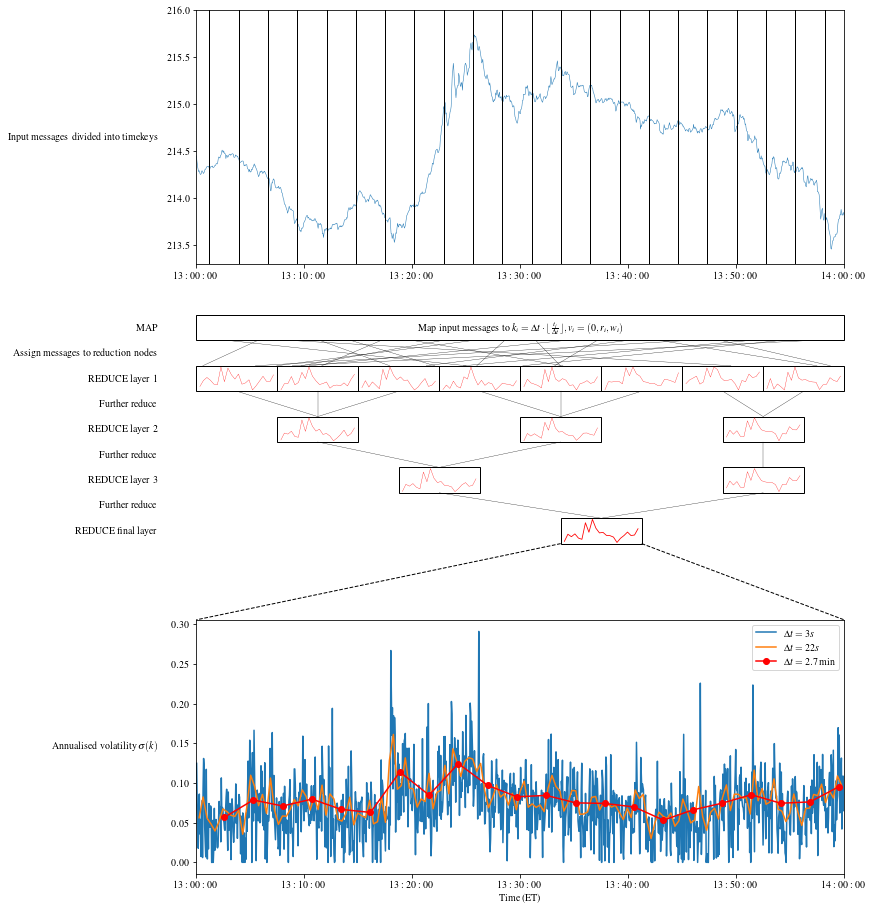

In [51]:
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(3)

ax = axs[0]
ax2 = axs[1]
ax3 = axs[2]

filte['numbins']=1000
filte['range']['time'] = [13*1000*3600,14*1000*3600]
t = sa.calculate_graph(sa.graphlist['midprice'],filte, histogram=True) 
ax.plot(t[0],t[1], linewidth=0.5)
ax.set_ylim(213.3,216)
ax.set_xlim(salib.to_date_i(13*3600*1000),salib.to_date_i(14*3600*1000))
ax2.set_xlim(0,1)
ax3.set_xlim(salib.to_date_i(13*3600*1000),salib.to_date_i(14*3600*1000))
ax2.axis('off')

filte['numbins']=1000
filte['range']['time'] = [13*1000*3600,14*1000*3600]
t = sa.calculate_graph(sa.graphlist['volatility'],filte, histogram=True)
ax3.plot(t[0],t[1], label="$\Delta t = 3s$")
print( t[0][1]-t[0][0])

filte['numbins']=100
filte['range']['time'] = [13*1000*3600,14*1000*3600]
t = sa.calculate_graph(sa.graphlist['volatility'],filte, histogram=True)
ax3.plot(t[0],t[1], label="$\Delta t = 22s$")
print( t[0][1]-t[0][0])

filte['numbins']=10
filte['range']['time'] = [13*1000*3600,14*1000*3600]
t = sa.calculate_graph(sa.graphlist['volatility'],filte, histogram=True)
ax3.plot(t[0],t[1], marker='o', color="red", label="$\Delta t = 2.7\min$")
ax3.legend()
print( t[0][1]-t[0][0])
d = t[0][1]-t[0][0]
for i in t[0]:
    ax.plot([i-d/2, i-d/2],[0,300], c='k', lw=1)
    ax.plot([i+d/2, i+d/2],[0,300], c='k', lw=1)

    
ax2.set_ylim(0,1)    
tw = 1
rect = patches.Rectangle((0, 0.9), tw, 0.1, linewidth=1, edgecolor='k', 
                             facecolor='none', clip_on=False)
ax2.add_patch(rect)    

inset_axes_a = add_subplot_axes(ax2,[0,0,1,1])
inset_axes_a.axis('off')
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1) 

N = 8
dh = 0.1
h = 0.7
d_map = [1,1,1,4,4,4,6.5,6.5]
for i in range(0,N):
    ii = i
    rect = patches.Rectangle((i*tw/N, h), tw/N, dh, linewidth=1, edgecolor='k', 
                                 facecolor='none', clip_on=False)
    
    inset_axes_a = add_subplot_axes(ax2,[i*tw/N, h, tw/N, dh])
    
    x_r, y_r = finalize(result[i])
    inset_axes_a.plot(x_r,y_r, linewidth=0.3, color="red")
    inset_axes_a.axis('off')
    ax2.add_patch(rect)    
    ax2.plot([(i+0.5)*tw/N, (d_map[ii]+0.5)*tw/N], [h,h-.1], clip_on=False, color="k", linewidth=0.3)

h = 0.5
i_map = [1,4,6.5]
d_map = [2.5,2.5,6.5]
for ii in range(0,3):
    i = i_map[ii]
    rect = patches.Rectangle((i*tw/N, h), tw/N, dh, linewidth=1, edgecolor='k', 
                                 facecolor='none', clip_on=False)
    inset_axes_a = add_subplot_axes(ax2,[i*tw/N, h, tw/N, dh])
    
    x_r, y_r = finalize(result_lvl2p[ii])
    inset_axes_a.plot(x_r,y_r, linewidth=0.3, color="red")
    inset_axes_a.axis('off')
    ax2.add_patch(rect)   
    ax2.plot([(i+0.5)*tw/N, (d_map[ii]+0.5)*tw/N], [h,h-.1], clip_on=False, color="k", linewidth=0.3)

h = 0.3
i_map = [2.5,6.5]
j_map = [3,2]
d_map = [4.5,4.5]
for ii in range(0,2):
    i = i_map[ii]
    rect = patches.Rectangle((i*tw/N, h), tw/N, dh, linewidth=1, edgecolor='k', 
                                 facecolor='none', clip_on=False)
    inset_axes_a = add_subplot_axes(ax2,[i*tw/N, h, tw/N, dh])
                    
    x_r, y_r = finalize(result_lvl2p[j_map[ii]])
    inset_axes_a.plot(x_r,y_r, linewidth=0.3, color="red")
    inset_axes_a.axis('off')
    ax2.add_patch(rect)  
    ax2.plot([(i+0.5)*tw/N, (d_map[ii]+0.5)*tw/N], [h,h-.1], clip_on=False, color="k", linewidth=0.3)


h = 0.1
for i in [4.5]:
    rect = patches.Rectangle((i*tw/N, h), tw/N, dh, linewidth=1, edgecolor='k', 
                                 facecolor='none', clip_on=False)
    inset_axes_a = add_subplot_axes(ax2,[i*tw/N, h, tw/N, dh])
                    
    x_r, y_r = finalize(result_lvl2p[4])
    inset_axes_a.plot(x_r,y_r, linewidth=0.8, color="red")
    inset_axes_a.axis('off')
    ax2.add_patch(rect) 
    

ax.text(-0.06,0.5, 'Input messages divided into timekeys', horizontalalignment='right',  transform = ax.transAxes,
     verticalalignment='center')
        
ax2.text(-0.06,0.95, 'MAP', horizontalalignment='right',  transform = ax2.transAxes,
     verticalalignment='center')   
ax2.text(-0.06,0.85, 'Assign messages to reduction nodes', horizontalalignment='right',  transform = ax2.transAxes,
     verticalalignment='center')
ax2.text(-0.06,0.75, 'REDUCE layer 1', horizontalalignment='right',  transform = ax2.transAxes,
     verticalalignment='center')  
ax2.text(-0.06,0.65, 'Further reduce', horizontalalignment='right',  transform = ax2.transAxes,
verticalalignment='center') 
ax2.text(-0.06,0.55, 'REDUCE layer 2', horizontalalignment='right',  transform = ax2.transAxes,
     verticalalignment='center')  
ax2.text(-0.06,0.45, 'Further reduce', horizontalalignment='right',  transform = ax2.transAxes,
verticalalignment='center')  

ax2.text(-0.06,0.35, 'REDUCE layer 3', horizontalalignment='right',  transform = ax2.transAxes,
     verticalalignment='center')
ax2.text(-0.06,0.25, 'Further reduce', horizontalalignment='right',  transform = ax2.transAxes,
verticalalignment='center')

ax2.text(-0.06,0.15, 'REDUCE final layer', horizontalalignment='right',  transform = ax2.transAxes,
     verticalalignment='center')  

ax2.text(.5,0.95, r'Map input messages to $k_i = \Delta t \cdot \lfloor\frac{t_i}{\Delta t}\rfloor, v_i = (0,  r_{i}, w_{i})$', horizontalalignment='center',  transform = ax2.transAxes,
     verticalalignment='center') 

ax3.text(-0.06,0.5, r'Annualised volatility $\sigma(k)$', horizontalalignment='right',  transform = ax3.transAxes,
     verticalalignment='center')


ax2.plot([4.5*tw/N, 0], [0.1,-0.2], clip_on=False, color="k", linewidth=1,linestyle='dashed')
ax2.plot([5.5*tw/N, 1], [0.1,-0.2], clip_on=False, color="k", linewidth=1,linestyle='dashed')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_xlabel('Time (ET)')
rand.seed(12345)
M = 21
for i in range(1,M):
    ax2.plot([i/M, rand.random()], [0.9,0.8], clip_on=False, color="k", linewidth=0.3)

plt.show()
fig.savefig(folder+"res_lob4.pdf")

In [52]:
# Regression Test
assert np.array([abs(a-b) < 1e-15 for a,b in zip(finalize(result_lvl2p[4])[1],t[1])]).all()
assert np.array([abs(a-b) == datetime.timedelta(0) for a,b in zip(finalize(result_lvl2p[4])[0],t[0])]).all()

In [54]:
def load_video(state):
    ii = ls[state['videonr']]
    state['id'] = ii['id']
    print('Analysing video',state['id'])
    cap = cv2.VideoCapture(video_hd_folder+'/'+state['id']+'.mp4')
    fps = cap.get(cv2.CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

    # Import OCR file of video
    j = ""
    with open(ocr_folder+'/'+ii['id']+'.json', 'r') as handle:
        j = json.load(handle)
        
    state['j'] = j
    
    tia = ['10:','11:','12:']

    results = []
    # Search for timestamps
    for ai in range(len(j['response']['annotationResults'])):
        a = j['response']['annotationResults'][ai]
        for bi in range(len(a['textAnnotations'])):
            b = a['textAnnotations'][bi]
            s = float(b['segments'][0]['segment']['startTimeOffset'].replace('s',''))
            r = datetime.datetime.combine(datetime.date.today(), datetime.time(hour=10))+datetime.timedelta(seconds=s)
            if any([q in b['text'] for q in tia]):
                results.append({'ai':ai,'bi':bi,'time':r.strftime("%H:%M:%S")})
    state['results'] = results
    state['ri'] = -1
    state['fps'] = fps
    state['cap'] = cap


In [55]:
video_hd_folder = '../../data/video_hd'
ocr_folder = '../../data/ocr'
timealignment_folder = '../../../../data/timealignment'

In [56]:
url='mongodb://192.168.0.94:27017/'
client = MongoClient(url)
tbl = client['global']['keynotes']
tbl2 = client['global']['timekeys']

In [57]:
def to_orig_time(timekey):
    k = round(timekey[1]/1000+timekey[0],4)
    hh = int(k/3600-3)
    mm = int((k%3600)/60)
    ss = k%3600%60
    return str(hh)+':'+str(mm)+':'+str(ss)

In [58]:
ls = list(tbl.find({'time_aligned':1}))
i = ls[2]

In [59]:
# Table with LOB statistics

In [61]:
result = {}

ls = list(tbl.aggregate([{'$match':{'lob_imported':1}},{'$sort':{'id':1}}]))
for sa in sa_array:
    cs = sa['sa'].ticks.aggregate(
               [

                 {
                   "$group":
                     {
                        "_id": {"type":"$type"},
                        "count": { "$sum": 1},

                     }
                 },
                   {"$project":{"_id":0,
                             "type":"$_id.type",
                             "count":1
                               }}

               ]
            )
    res = pd.DataFrame(list(cs))
    total = sum(res["count"])
    s = ''
    
    result[sa['kn']["id"]] = {'total':total,'percent':[100*list(res[res["type"]==k]["count"])[0]/total for k in ["execute","fill","trade", "sell", "buy", "cancel", "delete"]]}
    for k in ["execute","fill","trade", "sell", "buy", "cancel", "delete"]:
        s+=' & ' + '{:.1f} \%'.format(100*list(res[res["type"]==k]["count"])[0]/total)


In [62]:
for k,v in result.items():
    date = k.replace("_AAPL","")
    date = date[:4]+'/'+date[4:6]+'/'+date[6:]
    print(date +' & '+'{0:,}'.format(v['total']) +' & '+' & '.join(['{:.1f} \%'.format(i) for i in v['percent']])+' \\\\')
print('\hline \hline')
print('average' +' & '+'{0:,.0f}'.format(np.array([v['total'] for k,v in result.items()]).mean()) + ' & '+
    ' & '.join(['{:.1f} \%'.format(i) for i in np.array([v['percent'] for k,v in result.items()]).mean(axis=0)])+' \\\\')
print('$\pm$' +' & '+'{0:,.0f}'.format(np.array([v['total'] for k,v in result.items()]).std()) + ' & '+
    ' & '.join(['{:.1f} \%'.format(i) for i in np.array([v['percent'] for k,v in result.items()]).std(axis=0)]))

2019/09/10 & 2,666,981 & 1.3 \% & 3.3 \% & 0.6 \% & 25.2 \% & 23.8 \% & 0.0 \% & 45.8 \% \\
2019/03/25 & 2,375,114 & 0.7 \% & 2.6 \% & 0.4 \% & 24.2 \% & 25.1 \% & 0.2 \% & 46.7 \% \\
2018/10/30 & 2,403,211 & 0.9 \% & 3.1 \% & 0.7 \% & 23.7 \% & 25.3 \% & 0.5 \% & 45.9 \% \\
2018/09/12 & 1,445,328 & 1.8 \% & 5.6 \% & 2.1 \% & 24.1 \% & 23.9 \% & 0.1 \% & 42.4 \% \\
2018/06/04 & 735,427 & 1.0 \% & 3.7 \% & 0.7 \% & 24.0 \% & 24.9 \% & 0.4 \% & 45.2 \% \\
2018/03/27 & 1,829,568 & 0.8 \% & 3.1 \% & 0.6 \% & 24.5 \% & 24.5 \% & 0.5 \% & 45.9 \% \\
2017/09/12 & 2,459,380 & 0.9 \% & 3.5 \% & 0.7 \% & 24.9 \% & 24.2 \% & 0.2 \% & 45.6 \% \\
2017/06/05 & 977,881 & 0.7 \% & 2.8 \% & 0.3 \% & 22.6 \% & 26.8 \% & 0.2 \% & 46.5 \% \\
2016/10/27 & 1,232,260 & 0.6 \% & 2.1 \% & 0.2 \% & 25.7 \% & 23.7 \% & 0.3 \% & 47.4 \% \\
2016/09/07 & 1,119,270 & 0.7 \% & 2.9 \% & 0.4 \% & 24.4 \% & 24.9 \% & 0.4 \% & 46.3 \% \\
2016/06/13 & 1,596,302 & 0.5 \% & 2.4 \% & 0.3 \% & 24.0 \% & 25.5 \% & 0.3 \% & 47.

In [63]:
video_id = '20170912_AAPL'

In [64]:
cap = cv2.VideoCapture(video_hd_folder+'/'+video_id+'.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)


framenum= (3600+49*60+8.5)*fps
search_for_time = framenum/fps


cap.set(cv2.CAP_PROP_POS_FRAMES, framenum)

_,img = cap.read()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [65]:
# Get subtitles
# Lifecycle of an order

cs = client[video_id]['subtitle'] .aggregate(
           [
         
               {"$match":{"startTime":{"$lte":search_for_time},
                         "endTime":{"$gte":search_for_time},
                         }}
             

           ]
        )
res = pd.DataFrame(list(cs))

cs = client[video_id]['subtitle'] .aggregate(
           [
         
               {"$match":{"sentence":int(res["sentence"][0]),
                         }}
             

           ]
        )
res = pd.DataFrame(list(cs))

In [66]:
sentence = " ".join(res[24:32]["word"])

In [67]:
with open(ocr_folder+'/'+video_id+'.json', 'r') as handle:
    j = json.load(handle)

In [68]:
ocr_results = j['response']['annotationResults'][0]['textAnnotations']

In [70]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


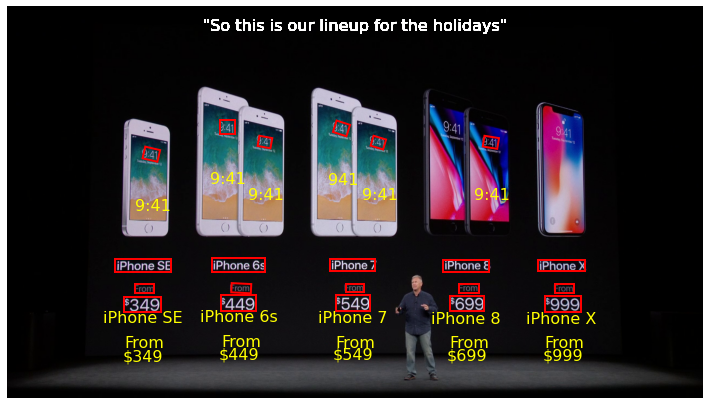

In [71]:
plt.rcParams.update({
    "text.usetex": False})


plt.rcParams["figure.figsize"] = (12.8*1,7.2*1)

fig, ax = plt.subplots()
plt.axis('off')
ax.imshow(img)

fn = cap.get(cv2.CAP_PROP_POS_FRAMES)



for a in ocr_results:
    for b in a['segments']:
        if float(b['segment']['startTimeOffset'].replace('s','')) < search_for_time and \
            float(b['segment']['endTimeOffset'].replace('s','')) > search_for_time:
                for c in b['frames']:
                    assert len(c['rotatedBoundingBox']['vertices'])==4

                    p = c['rotatedBoundingBox']['vertices']
                  
                    x = [p[0]['x'],p[1]['x'],p[2]['x'],p[3]['x']]
                    y = [1-p[0]['y'],1-p[1]['y'],1-p[2]['y'],1-p[3]['y']]
                    ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='red', linewidth=2, transform=ax.transAxes))
                    
                    
                    plt.text(0.5, 0.95, '"'+sentence+'"', horizontalalignment='center',
                         verticalalignment='center', transform=ax.transAxes, color="white", fontsize=16)
                    
                    plt.text(0.5*(x[1]+x[0]), y[0]-0.15, a['text'], horizontalalignment='center',
                         verticalalignment='center', transform=ax.transAxes, color="yellow", fontsize=16)
                    break
                        
plt.show()
fig.savefig(folder+"res_lob6.pdf")
plt.rcParams.update({
    "text.usetex": True})

In [72]:
# Table with Timekey stats
# Print statistics
total_n = 0
ls = list(tbl.aggregate([{'$match':{'time_aligned':1}},{'$sort':{'id':1}}]))
for i in ls:
    ls2 = list(tbl2.find({'id':i['id']}))
   
    sources = {}
    results = []
    xresult = []
    ls2 = sorted(ls2, key=lambda tup: tup['timekey'][0])
    
    for ii in ls2:
        xresult.append(ii['timekey'][0]/60)
        results.append(ii['timekey'][1])
    if len(results) == 0:
        continue
    total_n += len(results)
    print(i['id'].replace('_AAPL','')+ ' & '+
          str(len(results))+ ' & '+
          (salib.reset(datetime.datetime.now())+datetime.timedelta(seconds=xresult[0]*60)).strftime("%H:%M:%S")+ ' & '+
          (salib.reset(datetime.datetime.now())+datetime.timedelta(seconds=xresult[-1]*60)).strftime("%H:%M:%S")+ ' & '+
          (salib.reset(datetime.datetime.now())+datetime.timedelta(seconds=np.mean(results)/1000)).strftime("%H:%M:%S.%f")[:-3]+ ' & $\pm$ & '+
          str(int(np.std(results)))+" ms \\\\")
    
   

20150309 & 7 & 01:08:35 & 01:18:35 & 13:00:24.679 & $\pm$ & 44 ms \\
20150608 & 20 & 00:08:47 & 02:09:47 & 13:05:12.188 & $\pm$ & 107 ms \\
20150909 & 5 & 00:08:58 & 01:37:06 & 13:01:32.693 & $\pm$ & 25756 ms \\
20160613 & 24 & 00:15:28 & 01:38:28 & 12:59:31.350 & $\pm$ & 181 ms \\
20160907 & 3 & 00:27:45 & 00:38:45 & 13:03:14.676 & $\pm$ & 42 ms \\
20161027 & 2 & 00:20:05 & 01:05:06 & 13:00:54.213 & $\pm$ & 215 ms \\
20170605 & 6 & 00:17:17 & 01:22:17 & 13:06:42.672 & $\pm$ & 14 ms \\
20170912 & 4 & 00:32:48 & 01:36:48 & 13:00:11.301 & $\pm$ & 39 ms \\
20180604 & 6 & 00:53:58 & 01:47:58 & 13:00:01.615 & $\pm$ & 34 ms \\
20190325 & 3 & 00:15:29 & 00:17:29 & 12:59:30.567 & $\pm$ & 11 ms \\


In [73]:
total_n

80

In [74]:
choices = {
'20180604_AAPL':{2:{}}, #MacBook
'20160613_AAPL':{11:{'deltax':-0.04},17:{'deltax':-0.04,'color':'white'}}, # Apple watch, iphone
'20150608_AAPL':{8:{'color':'black'}} #iPad
}
imgresults = []

kk = 0
# Print statistics
ls = list(tbl.find({'time_aligned':1}))
for i in ls:
    ls2 = list(tbl2.find({'id':i['id']}))
    if i['id'] not in choices:
        continue
    print('Analysis for', i['id'])
    sources = {}
    results = []
    xresult = []
    ls2 = sorted(ls2, key=lambda tup: tup['timekey'][0])
    
    for ii in ls2:
        xresult.append(ii['timekey'][0]/60)
        results.append(ii['timekey'][1])
    
    if len(results) == 0:
        continue
        
    mean = np.mean(results)

    cap = cv2.VideoCapture(video_hd_folder+'/'+i['id']+'.mp4')
    fps = cap.get(cv2.CAP_PROP_FPS)

    j = ""
    k = -1
    with open(ocr_folder+'/'+i['id']+'.json', 'r') as handle:
        j = json.load(handle)
    for ii in ls2:
        k+=1
        if k not in  choices[i['id']]:
            continue
        if 'source' in ii:
            ocr = j['response']['annotationResults'][0]
            ocr_iid =  ocr['textAnnotations'][ii['source']]
        else:
            ocr = j['response']['annotationResults'][ii['source2']['res']['ai']]
            iid = ii['source2']['res']['bi']
            ocr_iid =  ocr['textAnnotations'][iid]
        
        framenum=ii['timekey'][0]*fps
        cap.set(cv2.CAP_PROP_POS_FRAMES, round(framenum-1))

        _,img = cap.read() 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fn = cap.get(cv2.CAP_PROP_POS_FRAMES) -1 
        assert fn == int(round(framenum-1)), (fn, framenum-1)

        _,img2 = cap.read() 
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        fn2 = cap.get(cv2.CAP_PROP_POS_FRAMES) - 1 
        assert fn2 == int(round(framenum)), (fn2, framenum)
        
        imgresults.append({
            'img':img,
            'img2':img2,
            'ocr_iid':ocr_iid,
            'framenum':ii['timekey'][0]*fps,
            'orig_time':to_orig_time(ii['timekey']),
            'options':choices[i['id']][k]
        })

        kk+=1
        
          

Analysis for 20180604_AAPL
Analysis for 20160613_AAPL
Analysis for 20150608_AAPL


In [75]:
def display_iid(img, img2, axs, ocr_iid, framenum, orig_time, options):
    segid = 0
    seg = ocr_iid['segments'][segid]
    frame = seg['frames'][segid]
    


    deltax = options['deltax'] if 'deltax' in options else 0 
    deltay = options['deltax'] if 'deltax' in options else 0


    # OVERVIEW
    axs[0].imshow(img2)

    p = frame['rotatedBoundingBox']['vertices']

    for a in p:
        if 'y' not in a:
            a['y']=0
            
    x = [p[0]['x']+deltax,p[1]['x']+deltax,p[2]['x']+deltax,p[3]['x']+deltax]
    y = [1-p[0]['y'],1-p[1]['y'],1-p[2]['y'],1-p[3]['y']]
    axs[0].add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='red', linewidth=2, transform=axs[0].transAxes))

    # BEFORE IMAGE
    for a in frame['rotatedBoundingBox']['vertices']:
        if 'y' not in a:
            a['y']=0
    box = [(int((a['x']+deltax)*img.shape[1]),int((a['y'])*img.shape[0])) for a in frame['rotatedBoundingBox']['vertices']]

    a = int((box[1][0]-box[0][0])*0.2) # 20% margin on each side
    simg = img[max(box[0][1]-a,0):min(box[3][1]+a,img.shape[0]),max(box[0][0]-a,0):min(box[1][0]+a,img.shape[1])]

    axs[1].imshow(simg)


    # AFTER IMAGE
    simg = img2[max(box[0][1]-a,0):min(box[3][1]+a,img2.shape[0]),max(box[0][0]-a,0):min(box[1][0]+a,img2.shape[1])]

    axs[2].imshow(simg)
    
    axs[2].text(0.5,-0.05, orig_time, horizontalalignment='center',
     verticalalignment='top', transform=axs[2].transAxes, color="k" , fontsize=30)

    

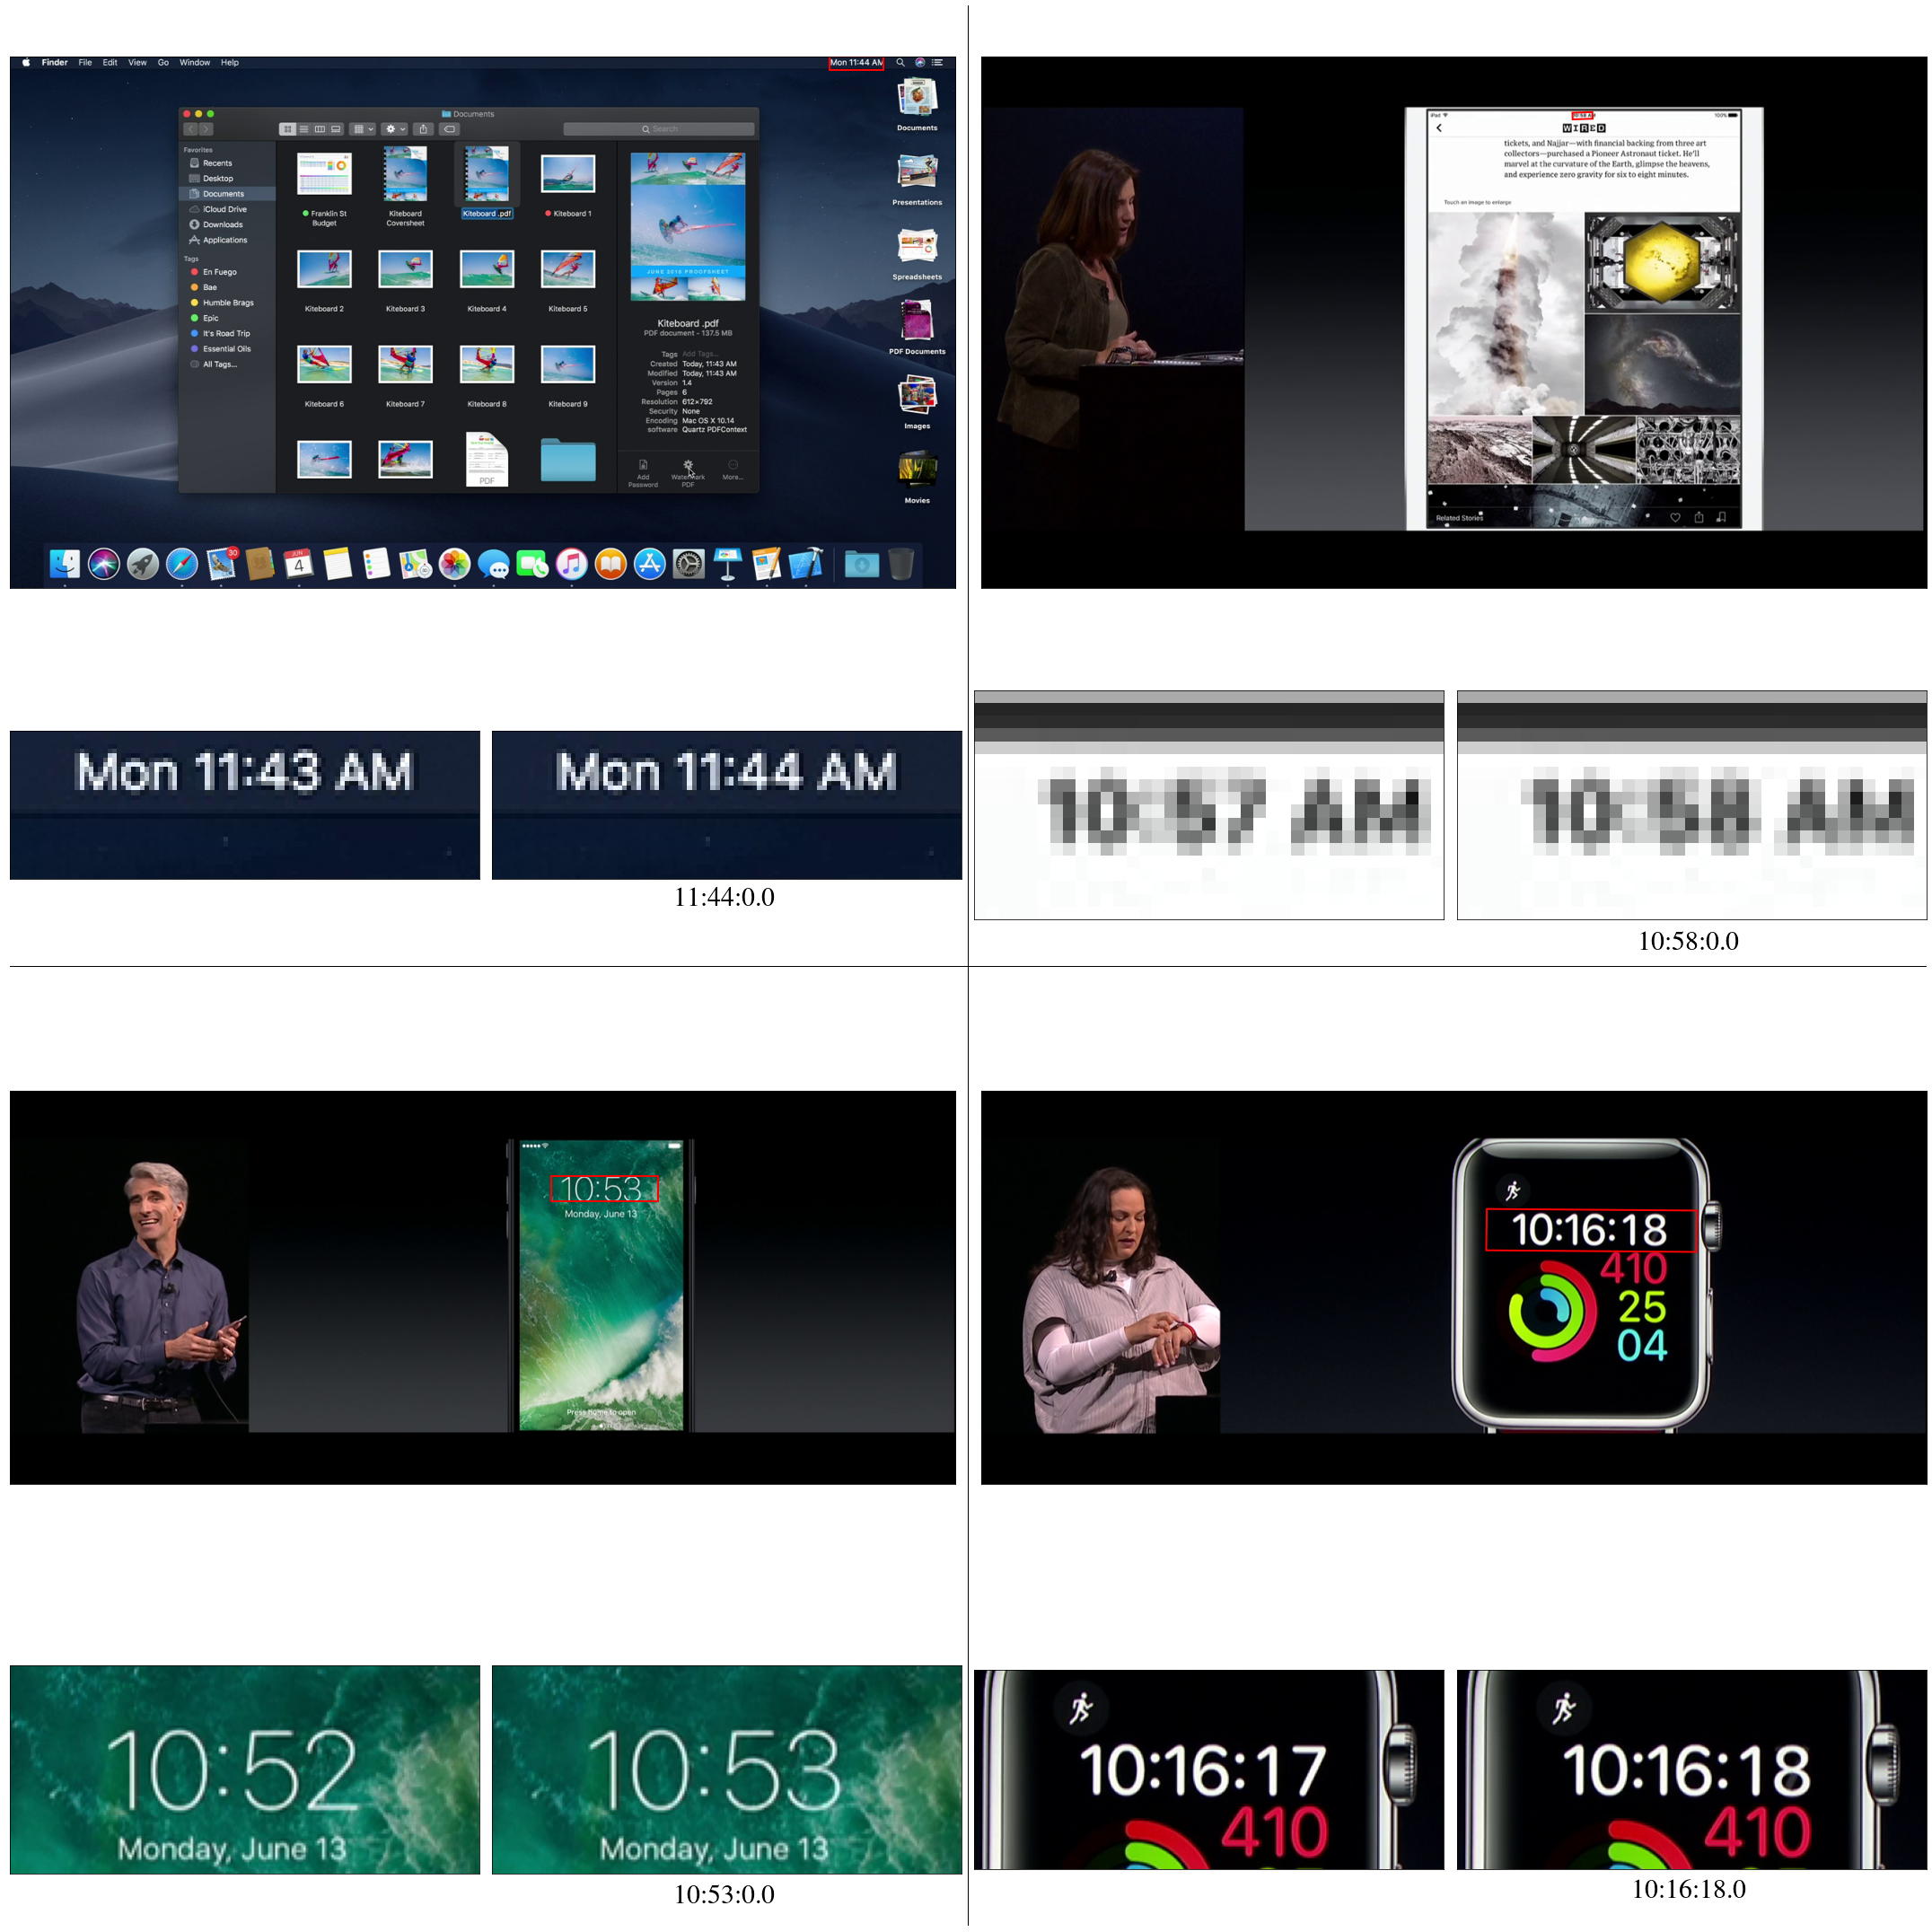

In [76]:
# Quick plotting
plt.rcParams["figure.figsize"] = (30,30)
idx_map = [1,8,7,2]
fig, axss = plt.subplots()
plt.axis('off')

for kk in range(0, len(imgresults)):
    r = imgresults[kk]
    axs = [fig.add_subplot(6,2, (idx_map[kk],idx_map[kk]+2)),
           fig.add_subplot(6,4,(idx_map[kk]+2)*2+3),
           fig.add_subplot(6,4,(idx_map[kk]+2)*2+4)]
    for ax in axs:
        #ax.axis('off')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
    img = r['img']
    img2 = r['img2']
    ocr_iid = r['ocr_iid']
    framenum = r['framenum']
    orig_time = r['orig_time']
    options = r['options']
    display_iid(img, img2, axs, ocr_iid,  
                           framenum=framenum, orig_time=orig_time, options=options)


axss.plot([0.5,0.5],[0,1],c='k', lw=1, transform=axss.transAxes)
axss.plot([0,1],[0.5,0.5],c='k', lw=1, transform=axss.transAxes)
plt.tight_layout()
plt.show() 
fig.savefig(folder+"res_lob7.pdf")

In [77]:
def format_y(a):
    return (salib.reset(datetime.datetime.now())+datetime.timedelta(seconds=a/1000)).strftime("%H:%M:%S.%f")[:-3]

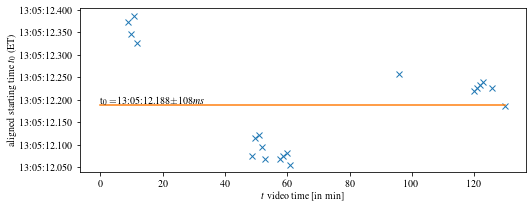

In [78]:
graph_pre()

i = '20150608_AAPL'

fig, ax = plt.subplots()

ls2 = list(tbl2.find({'id':i}))

sources = {}
results = []
xresult = []
ls2 = sorted(ls2, key=lambda tup: tup['timekey'][0])
ax.set_xlabel('$t$ video time [in min]')
ax.set_ylabel('aligned starting time $t_0$ (ET)')
for ii in ls2:
    xresult.append(ii['timekey'][0]/60)
    results.append(ii['timekey'][1])
ax.plot(xresult,results, linestyle="None" ,marker='x')
ax.plot([0,130],[np.mean(results),np.mean(results)])

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format_y(x)))

ax.text(0, np.mean(results), 't$_0=$'+format_y(np.mean(results))+'$ \pm '+str(int(round(np.std(results))))+' ms$', horizontalalignment='left',
     verticalalignment='bottom')
graph_post()

fig.savefig(folder+"res_lob8.pdf")

In [79]:
ls = list(tbl.aggregate([]))
for i in ls:
    # Quick analysis: Which weekdays are the keynotes?
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    datei = datetime.date(int(i['id'][0:4]),int(i['id'][4:6]),int(i['id'][6:8]))
    print(i['id'],weekDays[datei.weekday()])

20190603_AAPL Monday
20190325_AAPL Monday
20181030_AAPL Tuesday
20180912_AAPL Wednesday
20180604_AAPL Monday
20180327_AAPL Tuesday
20170912_AAPL Tuesday
20161027_AAPL Thursday
20160907_AAPL Wednesday
20160613_AAPL Monday
20160321_AAPL Monday
20150909_AAPL Wednesday
20150608_AAPL Monday
20150309_AAPL Monday
20141016_AAPL Thursday
20140909_AAPL Tuesday
20140602_AAPL Monday
20131022_AAPL Tuesday
20130910_AAPL Tuesday
20130610_AAPL Monday
20121023_AAPL Tuesday
20120912_AAPL Wednesday
20120611_AAPL Monday
20120307_AAPL Wednesday
20190910_AAPL Tuesday
20170605_AAPL Monday


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


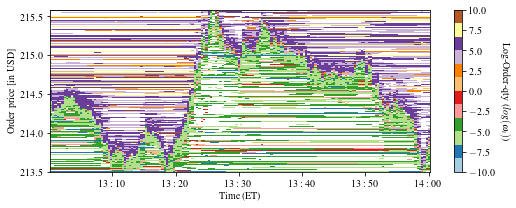

In [83]:
graph_pre()
fig, ax = plt.subplots()
salib.globalquery = []
filte["range"]["price"] = [2135050, 2156050]
filte["range"]["time"][0] = 13*3600*1000
filte["range"]["time"][1] = 14*3600*1000
filte['numbins']=1000
t = sa.calculate_graph(sa.graphlist['full_lob_2d'],filte, histogram=True)

t2= t
tddata = np.array(t2[0]).T
tddata = np.ma.masked_where(tddata == 0, tddata)

cmap = mpl.cm.get_cmap("Paired").copy()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
cmap.set_bad(color='white')

ax.set_xlabel('Time (ET)')
ax.set_ylabel('Order price [in USD]')

f = lambda x: x
f = lambda x: np.log(x)
im = ax.pcolormesh(t2[2], t2[1]-0.005, np.sign(tddata)*f(np.abs(tddata)), cmap=cmap)
cbar = plt.colorbar(im)
cbar.set_label(r'Log-Order-qty ($log(\omega_i)$)', rotation=270)
cbar.ax.get_yaxis().labelpad = 15

im.set_clim([-10,10])
graph_post()
fig.savefig(folder+"res_lob9.pdf")

In [84]:
res = client['global']['keynotes'].aggregate([{'$match':{'selected':1}}, {'$project':{'_id':0,'title':1, 'subtitle':1,  'id':1, 'local-time':1, 'time-zone':1, 'duration':1}},
                                        {'$sort':{'id':1}}])
res = list(res)

In [85]:
for i in res:
    print(
        i['id'][:4]+"/"+i['id'][4:6]+"/"+i['id'][6:8] + 
        " 10:00am ("+i['time-zone'].upper()+ ") & " +
        i['title'].replace('&','\&') + " & " +
        i['subtitle'].replace('&','\&')+ " & " +
        i['duration']+ " \\\\"
    )

2015/03/09 10:00am (PT) & Apple Special Event, March 2015 & Apple Watch, MacBook, ResearchKit, HBO NOW & 01:34:45 \\
2015/06/08 10:00am (PT) & Apple WWDC 2015 Keynote Address & Apple Music, OS X El Capitan, watchOS 2, iOS 9, News app, updates to Apple Pay & 02:24:41 \\
2015/09/09 10:00am (PT) & Apple Special Event, September 2015 & iPhone 6s \& iPhone 6s Plus, the all-new Apple TV with tvOS, iPad Pro, WatchOS 2 and iOS 9 & 02:19:45 \\
2016/03/21 10:00am (PT) & Apple Special Event, March 2016 & 9.7-inch iPad Pro, iPhone SE, Apple Watch and tvOS updates & 01:03:24 \\
2016/06/13 10:00am (PT) & Apple WWDC 2016 Keynote Address & iOS 10, macOS Sierra, watchOS 3 and Swift Playgrounds app & 02:03:00 \\
2016/09/07 10:00am (PT) & Apple Special Event, September 2016 & iPhone 7, iPhone 7 Plus, AirPods, Apple Watch Series 2, Apple Watch Hermès and Apple Watch Nike+ & 02:00:00 \\
2016/10/27 10:00am (PT) & Apple Special Event, October 2016 & MacBook Pro, Final Cut Pro X update, TV app for Apple TV, i

In [86]:
def xticks(xaxis, no_labels=5, mapf=None, isy=False):
    x = np.array(xaxis)
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) # step between consecutive labels
    x_positions = np.arange(0,nx,step_x) # pixel count at label position
    x_labels = x[::step_x] # labels you want to see
    if mapf:
        x_labels = mapf(x_labels)
    f = plt.yticks if isy else plt.xticks
    f(x_positions, x_labels)
    
def yticks(xaxis, no_labels=5,  mapf=None):
    xticks(xaxis=xaxis,no_labels=no_labels, mapf=mapf,isy=True)

def timetoimshowaxis(t, xaxis):
    scale = xaxis[1]-xaxis[0] # equals 1
    offset = xaxis[0]
    return -0.5 + (t-offset)/scale


In [88]:
def draw_graph_2d(g,f, draw=True, normalize=False, mapf=None, clim=None, clabel=None, normdt=False):
    res = []
    xaxis = None
    yaxis = []
    for sa in sa_array:
        t = sa['sa'].calculate_graph(g,f, histogram=True)
        
        if not ( xaxis is None or xaxis == t[0]):
            assert len(xaxis) > len(t[0])
            print( 'axis not same length')
            while len(t[0]) != len(xaxis):
                for i in range(0,len(t[0])):
                    if xaxis[i] != t[0][i]:
                        t = (np.insert(t[0], i, xaxis[i]), np.insert(t[1], i, 0))
                        break
            assert (t[0] == xaxis).all(), (t[0], xaxis)
        
        if not xaxis:
            xaxis = t[0]
        rrr = np.array(t[1],dtype=float)
        if normdt:
            rrr /= (t[0][1]-t[0][0]).total_seconds()
        res.append(rrr)
        tt = sa['kn']['id']
        yaxis.append(tt[:4]+'/'+tt[4:6]+'/'+tt[6:8])

    if not draw:
        return res, xaxis, yaxis
    
    if mapf:
        for i in range(len(res)):
            res[i] = mapf(res[i])
            
    if normalize:
        for i in range(len(res)):
            res[i] /= res[i].mean()

    
    fig, ax = plt.subplots()
    ax.set_yticks(range(16))
    yaxis2 = yaxis.copy()
    yaxis2.insert(0,'')
    ax.set_yticklabels( yaxis2)
    cmy = yaxis
    cmy.insert(0,'')
    
    cmy = np.array(list(range(0, len(cmy))))+0.5
    cmx = xaxis
    
    dddt = (cmx[1]-cmx[0])
    cmx.append(cmx[-1]+dddt)
    
    im = ax.pcolormesh (cmx, cmy, res,  cmap=plt.get_cmap("tab20b"))
   
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)

    if clim:
        im.set_clim(clim)
    cb = fig.colorbar(im, cax=cax, orientation='vertical') 
      
    cb = fig.colorbar(im, cax=cax, orientation='vertical') 
    if clabel:
        cb.ax.get_yaxis().labelpad = 15
        cb.ax.set_ylabel(clabel, rotation=270)
    
    ttia = lambda x : timetoimshowaxis(x, xaxis) # abbreviation
    assert ttia(xaxis[0])==-0.5
    assert ttia(xaxis[len(xaxis)-1])==-0.5+len(xaxis)-1
    for i in range(len(sa_array)):
        sa = sa_array[i]
        # Create a Rectangle patch
        sstart = sa['kn']['time_mapping'][0]['stock_time_start']
        sstop = sa['kn']['time_mapping'][-1]['stock_time_end']
        start = salib.to_date_i(sstart)
        stop = salib.to_date_i(sstop)
        ttia = lambda x: x

        rect = patches.Rectangle((ttia(start),0.5+i),ttia(stop)-ttia(start),1,
                                 linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

    ax.set_xlabel('Starting time of each bin (ET)')
    
    return fig,ax
    



In [89]:
myFmt = mdates.DateFormatter('%H:%M:%S')

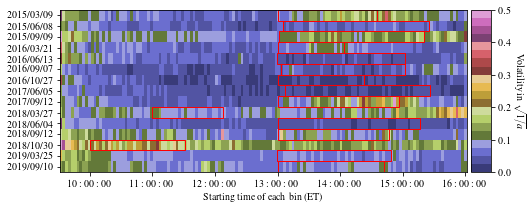

In [90]:
graph_pre()
filte['numbins']=100
filte['range']['time'] = [9.5*3600*1000, 16*3600*1000]

fig,ax =  draw_graph_2d(sa.graphlist['volatility'], filte, normalize=False, clim=[0,0.5], clabel='Volatility in $\sqrt{1/a}$') 


ax.xaxis.set_major_formatter(myFmt)

graph_post()
fig.savefig(folder+"res_lob11.pdf")


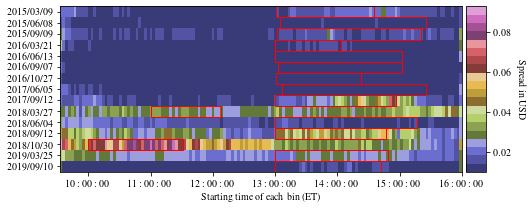

In [91]:
graph_pre()
filte['numbins']=100
filte['range']['time'] = [9.5*3600*1000, 16*3600*1000]

fig,ax =  draw_graph_2d(sa.graphlist['spread'], filte, normalize=False,  clabel='Spread in USD') 

graph_post()
ax.xaxis.set_major_formatter(myFmt)
fig.savefig(folder+"res_lob12.pdf")

In [92]:
additionalgraphs = [
('marketorder_vis', 'Market orders (volume) [in USD/s]', 'Market order heat map'),
('limitorder', 'New limit orders (volume) [in USD/s]','New limit order heat map'),
('marketorder_num','Market activity [in 1/s]', 'Market activity heat map'),
('limitorder_num','Limit order rate [in 1/s]','Heat map of limit order rate'),
('messages_num', 'Total message rate [in 1/s]','Heat map of total message rate')
]

In [93]:
for k,_,v in additionalgraphs:
    print(r"""\begin{figure}[h!]
\centering
    \includegraphics[width=1.0\textwidth, trim=0 15 0 0]{generated_figures/res_lob_"""+k+""".pdf}
    \caption{"""+v+""" for the analysed dates. Marked in red are the times of a keynote}
\end{figure}
    """)

\begin{figure}[h!]
\centering
    \includegraphics[width=1.0\textwidth, trim=0 15 0 0]{generated_figures/res_lob_marketorder_vis.pdf}
    \caption{Market order heat map for the analysed dates. Marked in red are the times of a keynote}
\end{figure}
    
\begin{figure}[h!]
\centering
    \includegraphics[width=1.0\textwidth, trim=0 15 0 0]{generated_figures/res_lob_limitorder.pdf}
    \caption{New limit order heat map for the analysed dates. Marked in red are the times of a keynote}
\end{figure}
    
\begin{figure}[h!]
\centering
    \includegraphics[width=1.0\textwidth, trim=0 15 0 0]{generated_figures/res_lob_marketorder_num.pdf}
    \caption{Market activity heat map for the analysed dates. Marked in red are the times of a keynote}
\end{figure}
    
\begin{figure}[h!]
\centering
    \includegraphics[width=1.0\textwidth, trim=0 15 0 0]{generated_figures/res_lob_limitorder_num.pdf}
    \caption{Heat map of limit order rate for the analysed dates. Marked in red are the times of a keynote}

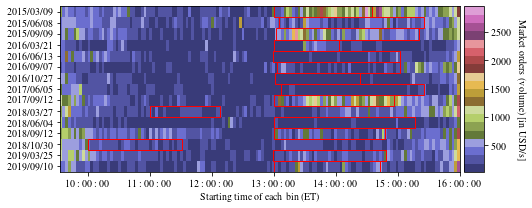

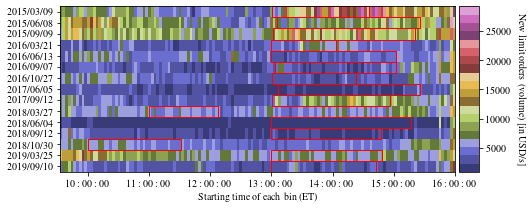

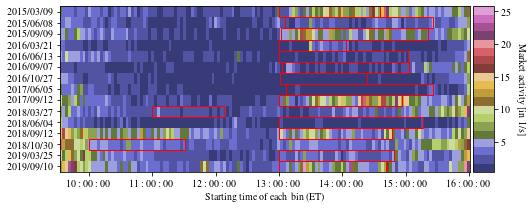

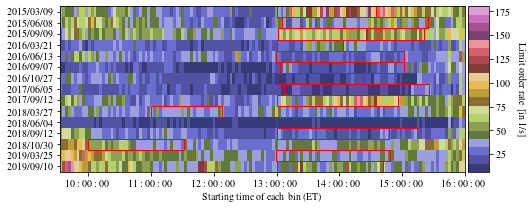

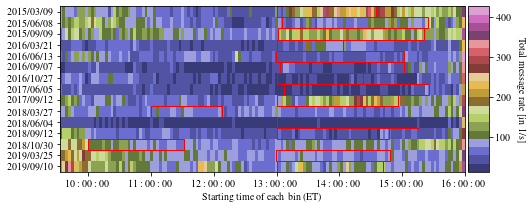

In [94]:
for k,v,_ in additionalgraphs:

    graph_pre()
    filte['numbins']=100
    filte['range']['time'] = [9.5*3600*1000, 16*3600*1000]

    fig,ax =  draw_graph_2d(sa.graphlist[k], filte, normalize=False, normdt=True, clabel=v) 

    graph_post()
    ax.xaxis.set_major_formatter(myFmt)
    fig.savefig(folder+"res_lob_"+k+".pdf")
    plt.show()